In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [13]:
comments = pd.read_csv(r'C:\Users\alexe\Desktop\Stack Exchange\comments.csv',parse_dates = ['CreationDate'])
votes = pd.read_csv(r'C:\Users\alexe\Desktop\Stack Exchange\votes.csv',parse_dates = ['CreationDate'])
posts = pd.read_csv(r'C:\Users\alexe\Desktop\Stack Exchange\posts.csv',parse_dates = ['CreationDate'])
users = pd.read_csv(r'C:\Users\alexe\Desktop\Stack Exchange\users.csv')

In [5]:
comments.head(1)

,Id,PostId,Text,CreationDate,UserId
0,2,1138,"Sure, I edited the question accordingly.",2012-12-19 02:58:04.620,548


In [6]:
votes.head(1)

,Id,PostId,CreationDate,UserId
0,3,1,2011-11-30,231


In [94]:
posts.head(1)

,Id,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,ClosedDate
0,1,2011-11-30 19:15:54.070,25,1526,<p>Some comedian/actors are given creative fre...,1562,532,2013-09-25 14:15:14.257,2013-09-25 14:15:14.257,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2011-12-24 19:15:54.070


In [7]:
users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2011-11-30 17:13:53.160,Community,2011-11-30 17:13:53.160,http://meta.stackexchange.com/,on the server farm,NaN,"<p>Hi, I'm not really a person.</p> <p>I'm a ...",0,1542,1233


# Basic Analysis

1.How many post were made each year?

In [24]:
posts['Year'] = posts['CreationDate'].dt.year
posts.groupby('Year')['Id'].count().to_frame().rename(columns={'Id':'Posts'})

,Posts
Year,
2011,156
2012,1065
2013,1018


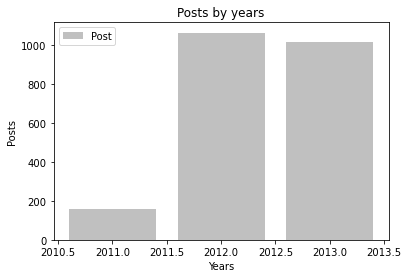

In [92]:
#Visualization_Part_1_Q1

posts['Year'] = posts['CreationDate'].dt.year
posts['Posts'] = posts.groupby('Year')['Id'].count().to_frame().rename(columns={'Id':'Posts'})

x = posts['Year']
y = posts['Posts']

plt.bar(x.index,y,label="Post",color='Silver')

plt.xlabel('Years')
plt.ylabel('Posts')
plt.title('Posts by years')
plt.legend()
plt.show()

2.How many votes were made in each day of the week (Sunday,Monday,Tuesday...)?

In [14]:
votes['day_week']=votes['CreationDate'].dt.weekday

def weekday_func(day_week):
    if day_week == 6:
        output = 'Sunday'
    elif day_week == 0:
        output = 'Monday'
    elif day_week == 1:
        output = 'Tuesday'
    elif day_week == 2:
        output = 'Wednesday'
    elif day_week == 3:
        output = 'Thursday'
    elif day_week == 4:
        output = 'Friday'
    else:
        output = 'Saturday'
    return output

votes['Day'] = votes['day_week'].apply(weekday_func)

votes.groupby('Day')['Id'].count().to_frame().rename(columns={'Id':'Votes'})\
.sort_values('Votes', ascending = False)

,Votes
Day,
Thursday,869
Friday,735
Wednesday,554
Saturday,376
Tuesday,354
Monday,282
Sunday,189


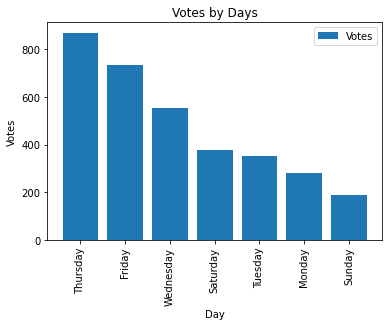

In [19]:
#Visualization_Part_1_Q2

votes['Day'] = votes['day_week'].apply(weekday_func)
votes_groupby = votes.groupby('Day')['Id'].count().to_frame().rename(columns={'Id':'Votes'})\
.sort_values('Votes', ascending = False)


x = votes_groupby
y = votes_groupby['Votes']

plt.bar(x.index,y,label='Votes')
plt.xticks(rotation = 90)

plt.xlabel('Day')
plt.ylabel('Votes')

plt.title('Votes by Days')
plt.legend()

plt.show()


3.List all comments created on September 19th, 2012

In [97]:
comments['CreationDate'] = pd.to_datetime(comments['CreationDate'])
comments['CreationDate_justdate'] = comments['CreationDate'].dt.floor('d')

date_filter = comments['CreationDate_justdate'] == '2012-09-19'

comments[date_filter]

,Id,PostId,Text,CreationDate,UserId,CreationDate_Dateonly,CreationDate_justdate,CreationDate_Justdate
1414,3476,887,I had the same thoughts. I'm wondering if ther...,2012-09-19 10:34:12.983,233,2012-09-19,2012-09-19,2012-09-19
1484,3623,890,"hmmm he's described as ""an over-the-top public...",2012-09-19 18:23:37.193,126,2012-09-19,2012-09-19,2012-09-19


4.List all users under the age of 33, living in London

In [72]:
filter_1 = users['Age'].notnull()
filter_2 = users['Location'].notnull()

filter_notnull = filter_1 & filter_2
filter_age_loc = users['Location'].str.contains('London') & (users['Age'] < 33)

users[filter_notnull & filter_age_loc].head(3)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
27,27,101,2011-11-30 18:58:00.620,Noldorin,2011-12-27 00:54:12.993,http://noldorin.com/,"London, United Kingdom",24.0,<p>entrepreneur; graduate in mathematics / the...,0,0,0
155,160,101,2011-12-04 14:01:19.123,Willbill,2013-02-06 10:19:52.963,NaN,"London, United Kingdom",31.0,NaN,1,6,0
451,473,101,2011-12-29 16:57:11.727,bobble14988,2011-12-29 16:57:11.727,http://www.bobbleworks.co.uk,"London, United Kingdom",26.0,<p>Third year university student who recently ...,0,0,0


# Advanced Analysis

1.Display the number of votes for each post title

In [26]:
my_join = votes.merge(posts,
                      how = 'right',
                      left_on = 'PostId',
                      right_on = 'Id')

my_join.groupby('Title')['Id_x'].count().to_frame().rename(columns={'Id_x':'Votes'}).head(3)

,Votes
Title,
"""Are you gonna get that?"" ""Get what?"" Then a red phone rings",0
"""In the next episode..."" plot points don't appear in the next episode?",0
"""No Country for Old Men"", why is it called so?",0


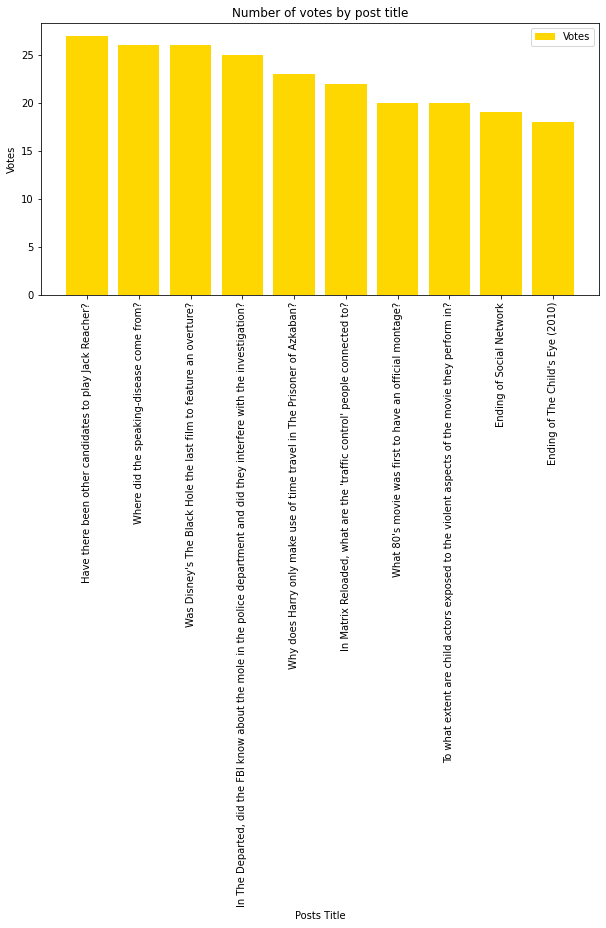

In [63]:
#Visualization_Part_2_Q1

my_join = votes.merge(posts,
                      how = 'right',
                      left_on = 'PostId',
                      right_on = 'Id')
data = my_join.groupby('Title')['Id_x'].count().to_frame()\
.rename(columns={'Id_x':'Votes'})\
.sort_values('Votes', ascending=False).head(10)


x = data.index
y = data['Votes']

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)

plt.bar(x,y,label='Votes',color='Gold')


plt.xlabel('Posts Title')
plt.ylabel('Votes')
plt.title('Number of votes by post title')
plt.legend()
plt.show()

2.Display posts with comments created by users living in the same location as the post creator

In [222]:
join_1 = comments.merge(users,
                        how = 'inner',
                        left_on = 'UserId',
                        right_on = 'Id')

join_2 = join_1.merge(posts,
                     how = 'inner',
                     left_on = 'UserId',
                     right_on = 'Id')

filter_loc = join_1['Location'] == join_2['Location']
join_1[['Location','Text']][filter_loc].head(3)

,Location,Text
0,"Princeton, NJ","Sure, I edited the question accordingly."
1,"Princeton, NJ","In my opinion, the different thought about ted..."
2,"Princeton, NJ","Lauren, international versions of shows like T..."


3.How many users have never voted?

In [87]:
join_uv = users.merge(votes,
                how = 'left',
                left_on = 'Id',
                right_on = 'UserId')

filter_null = join_uv['PostId'].isnull()
never_voted = join_uv[filter_null]['Id_x'].count()
num_users = users['Id'].count()

"From {} users of Movies & TV Stack Exchange\
 {} users have never voted".format(num_users,never_voted)


'From 1778 users of Movies & TV Stack Exchange 355 users have never voted'

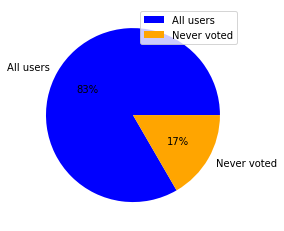

In [73]:
#Visualization_Part_2_Q3

p_size = [1778,355]
p_labels = 'All users', 'Never voted'
p_colors = ['Blue','Orange']

plt.pie(p_size,labels = p_labels,colors = p_colors, autopct='%.f%%')

plt.legend(p_labels)
plt.show()


4.Display all posts having the highest amount of comments

In [75]:
join_pc = posts.merge(comments,
                     how = 'inner',
                     left_on = 'Id', 
                     right_on = 'PostId')

join_pc.groupby('Title')['Id_y'].count().to_frame()\
.sort_values('Id_y',ascending = False)\
.rename(columns = {'Id_y':'Amount_of_comments'}).head(3)

,Amount_of_comments
Title,
"How much money did it take to run ""The Sting""?",5
Old movie about two pilots and a cheating wife,5
What is Jerusalem worth?,5


5.For each post, how many votes are coming from users living in Canada? 

What’s their percentage of the total number of votes?

In [66]:
join_vp = votes.merge(posts,
                    how = 'inner',
                    left_on = 'PostId',
                    right_on = 'Id')
                    
join_vpu = join_vp.merge(users,
                      how = 'inner',
                      left_on = 'UserId',
                      right_on = 'Id')


In [67]:
filter_notnull = ~ join_vpu['Location'].isnull()
join_vpu = join_vpu[filter_notnull]

In [68]:
country_filter = join_vpu['Location'].str.contains('Canada')

votes_canada = join_vpu[country_filter].groupby('Title')['Location'].count().to_frame()\
.rename(columns={'Location':'Votes_Canada'})


In [69]:
votes_all = join_vpu.groupby('Title')['Location'].count().to_frame()\
.rename(columns={'Location': 'Votes_Global'})


In [70]:
join_all_canada = votes_all.merge(votes_canada,
                                   how = 'left',
                                   left_on = 'Title',
                                   right_on = 'Title')

join_all_canada['Percentage'] = join_all_canada['Votes_Canada']/join_all_canada['Votes_Global']*100

join_all_canada.head(3)

,Votes_Global,Votes_Canada,Percentage
Title,,,
"""Road"" picture about guys in a tank, possibly set in the Middle East",4,1.0,25.0
"""Rock TV"" animated/live action series from the early to mid 80s",3,NaN,NaN
"""The Club"" where Jerry Seinfeld performed",1,NaN,NaN


6.How many hours in average, it takes to the first comment to be posted after a creation of a new post?

In [59]:
comments_min = comments.groupby('PostId')['CreationDate'].min()

my_join = posts.merge(comments_min,
                     how = 'inner',
                     left_on = 'Id',
                     right_on = 'PostId')


my_join['Time_reaction'] = (my_join['CreationDate_y'] - my_join['CreationDate_x'])
reaction_time = my_join['Time_reaction'].mean()

'{} it is average time, what takes to the first comment to be posted after a creation of a new post'.format(reaction_time)

'0 days 07:09:06.153846153 it is average time, what takes to the first comment to be posted after a creation of a new post'

7.Whats the most common post tag?

In [64]:
tag_list = list(posts['Tags'].str.split('><'))
my_list  = list()


for tags in tag_list:
    for tag in tags:
        my_list.append(tag)
        
count_list = [[my_list.count(tag),tag] for tag in set(my_list)]

count_list.sort(reverse=True)
tag = count_list[0]

'The number of uses, and the most common post tag {}'.format(tag)

"The number of uses, and the most common post tag [651, '<plot-explanation']"

8.Create a pivot table displaying how many posts were created for each year (Y axis) and
each month (X axis)

In [77]:
posts['Year'] = posts['CreationDate'].dt.year
posts['Month'] = posts['CreationDate'].dt.month

posts.pivot_table(index = 'Year', columns ='Month', values='Id', aggfunc='count')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0,140.0
2012,92.0,72.0,62.0,88.0,93.0,105.0,105.0,81.0,60.0,75.0,77.0,155.0
2013,129.0,99.0,107.0,92.0,130.0,120.0,134.0,143.0,64.0,NaN,NaN,NaN
